In [1]:
import numpy as np
import scipy.linalg
import scipy.io
import scipy.sparse
import matplotlib.pyplot as plt
from scipy import spatial, sparse
%matplotlib inline

# Problem 1 (LU decomposition)
## 30 pts

### 1. LU for band matrices (5 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– tridiagonal matrices.

- Find the number of operations to compute an $LU$ decomposition of a tridiagonal matrix taking into account only non-zero elements. How many nonzero elements are in factors $L$, $U$ and where are they located? Conclude what is the complexity to solve a linear system with tridiagonal matrix in terms of $n$. 

### 2. Completing the proof of existence of LU (10 pts)

Some details in lecture proofs about $LU$ were omitted. Let us complete them.
- Prove that if $LU$ decomposition exists, then matrix is strictly regular.
- Prove that if $A$ is strictly regular, then $A_1 = D - \frac 1a b c^T$ (see lectures for notations) is also strictly regular.

### 3. Stability of LU (10 pts)

Let
$A = \begin{pmatrix}
a & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* Find analytically an $LU$ decomposition of the matrix $A$.
* For what values of $a$ does the LU decomposition of $A$ exist?
* Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|a|\ll 1$ in computer arithmetic?
How can this problem be solved?


### 4. Block LU (5 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system
$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* Using block elimination find matrix $S$ and right-hand side $f_2$ so that $u_2$ can be found from $S u_2 = f_2$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.

# Solutions:
### 1.

For the first iteration of LU decomposition for tridiagonal matrix

$$\begin{bmatrix}
a_{11} && a_{12} && 0 &&\ldots && \ldots && 0 \\
a_{21} && a_{22} && a_{23} && 0&&\ldots && 0  \\
 0 && a_{32} && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && a_{n-2,n-2}&&a_{n-2,n-1}&&0 \\
0 && 0 && \ldots && a_{n-1, n-2}&&a_{n-1,n-1} &&a_{n-1,n}\\
0 && 0 && \ldots && 0&&a_{n-1,n}&& a_{nn} \\
\end{bmatrix} \rightarrow
\begin{bmatrix}
a_{11} && a_{12} && 0 &&\ldots && \ldots && 0 \\
0 && * && a_{23} && 0&&\ldots && 0  \\
 0 && a_{32} && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && a_{n-2,n-2}&&a_{n-2,n-1}&&0 \\
0 && 0 && \ldots && a_{n-1, n-2}&&a_{n-1,n-1} &&a_{n-1,n}\\
0 && 0 && \ldots && 0&&a_{n-1,n}&& a_{nn} \\
\end{bmatrix}$$

we have to make $3$ operations: one addition and $2$ multiplications. After that we have to make the same operations for tridiagonal matrix $(n-1)\times(n-1)$. So we have to make $4$ operations for $i$-th iteration. Hence, the total amount of operations is $4(n-1)$. It can be easily seen that $L$ consists only of diagonal and upper diagonal elements. $U$ consists only of lower diagonal and diagonal elements, because at $i$-th iteration we add $i$-th row only to $(i+1)$-th one. We see that LU decomposition for tridiagonal matrices is $\mathcal{O}(n)$ and, obviously, solving systems $Ux = y$ and $Lx = \tilde{y}$ are $\mathcal{O}(n)$. So total time is $\mathcal{O}(n)$.

### 2.
a) We know that $A$ is non singular, so $det(L)\neq 0$ and $det(U)\neq 0$. Hence, all elements $L_{ii}$ and $U_{ii}$ are not zero, so all principal minors of matrices $L$ and $U$ are not zero. It can be easily seen principal minors of matrix $A$ are multiplications of principal minors of $L$ and $U$, more precisely

$$A_k = L_k \cdot U_k\neq 0$$

Where $A_k$ is principal minor $k\times k$ of matrix $A$. Hence, matrix $A$ is strictly regular.

b) Set

$$A = \begin{bmatrix}
a && c^T\\
b && D
\end{bmatrix}$$

After the first step of Gaussian elimination we obtain

$$A = \begin{bmatrix}
a && c^T\\
b && D
\end{bmatrix}
\rightarrow
\begin{bmatrix}
a && c^T\\
0 && D - \frac{1}{a}b\cdot c^T
\end{bmatrix}$$

We know that principal minors of the left matrix are equal to principal minors of the right matrix. So we see that

$$A_k = a\cdot \left(D - \frac{1}{a}b\cdot c^T\right)_{k-1}$$

Hence, $D - \frac{1}{a}b\cdot c^T$ is also strictly regular.

# Problem 2 (QR decomposition) 

## 20 pts

### 1. Standard Gram-Schmidt algorithm (10 pts)
Our goal now is to orthogonalize a system of linearly independent vectors $v_1,\dots,v_n$.
The standard algorithm for the task is the Gram-Schmidt algorithm:

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Now $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to get orthonormal system you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.
The Gram-Schidt process can be viewed as a QR decomposition. Let us show that.

* Write out what is $Q$ and $R$ obtained in the process described. 


* Implement the described Gram-Schmidt algorithm as a function ```gram_schmidt(A)```, which outputs ```Q,R``` and check it on a random $100\times 100$ matrix $B.$ Print out the error. 

**Note:** To check orthogonality calculate the matrix of scalar products $G_{ij} = (u_i, u_j)$ (called <font color='red'> Gram matrix </font> of set of vectors $u_1,\dots, u_n$) which should be equal to the identity matrix $I.$ Error $\|G - I\|_2$ will show you how far is the system $u_i$ from orthonormal.


* Create a Hilbert matrix $A$ of size $100\times 100$ without using loops.
Othogonalize its columns by the described Gram-Schmidt algorithm. Is the Gram matrix close to the identity matrix in this case? Why?


The observed loss of orthogonality is a problem of this particular algorithm. To avoid it [modified Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#Numerical_stability), QR via Householder reflections or Givens rotations can be used.

## Solutions
Set $e_i = \frac{u_i}{\|u_i\|}$. Then using expressions for $u_i$ we obtain

$$
\begin{split}
v_1 &= u_1, \\
v_2 &= u_2 + \frac{\langle v_2, u_1 \rangle}{\|u_1\|^2} u_1, \\
v_3 &= u_3 + \frac{\langle v_3, u_1\rangle}{\|u_1\|^2} u_1 + \frac{\langle v_3, u_2\rangle}{\|u_2\|^2} u_2, \\
\dots \\
v_n &= u_n + \frac{\langle v_n, u_1\rangle}{\|u_1\|^2} u_1 + \frac{\langle v_n, u_2\rangle}{\|u_2\|^2} u_2 + \dots + \frac{\langle v_n, u_{n-1}\rangle}{\|u_{n-1}\|^2} u_{n-1}.
\end{split}
$$

In terms of $e_i$

$$
\begin{split}
v_1 &= \langle e_1, v_1\rangle e_1, \\
v_2 &= \langle e_1, v_2\rangle e_1 + \langle e_2, v_2\rangle e_2, \\
v_3 &= \langle e_1, v_3\rangle e_1 + \langle e_2, v_3\rangle e_2 + \langle e_3, v_3\rangle e_3, \\
\dots \\
v_n &= \langle e_1, v_n\rangle e_1 + \ldots + \langle e_n, v_n\rangle e_n.
\end{split}
$$


In matrix form

$$V = [e_1,\ldots, e_n]\cdot
\begin{bmatrix}
\langle e_1, v_1 \rangle && \langle e_1, v_2 \rangle && \ldots && \langle e_1, v_n \rangle \\
0 && \langle e_2, v_2 \rangle && \ldots && \langle e_2, v_n \rangle \\
\vdots && \vdots && \ddots && \vdots\\
0 && 0 && \ldots && \langle e_n, v_n \rangle
\end{bmatrix}$$

Obviously, $Q = [e_1,\ldots, e_n]$ is orthonormal matrix. So this is QR decomposition for matrix $V$.

In [2]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A=QR
def gram_schmidt(A): # 5 pts
    # enter your code here
    n = A.shape[0]
    Q = np.zeros((n,n))
    for i in range(n):
        Q[:, i] = A[:, i] - sum( np.dot(A[:, i], Q[:, j]) / np.dot(Q[:, j], Q[:, j]) * Q[:, j] for j in range(i)) 
    for i in range(n):
        Q[:, i] = Q[:, i] / np.linalg.norm(Q[:, i]) 
    R = Q.T@A    
    return Q, R

In [3]:
np.random.seed(42)
B = np.random.rand(100,100)
Q,R = gram_schmidt(B)
print (np.linalg.norm(Q@R-B))

1.15719974122e-12


In [4]:
def Gram_matrix(Q):
    n = Q.shape[0]
    G = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            G[i][j] = np.dot(Q[i], Q[j])
    return G
n = 100
G = Gram_matrix(Q)
print ('||G(B) - I|| =', np.linalg.norm(G - np.eye(n)))

||G(B) - I|| = 2.30426355448e-12


In [5]:
n = 100
I = np.array([range(1, n+1)] * n)
H = 1.0 / (I + I.T - 1)
H_Q, H_R = gram_schmidt(H)
G = Gram_matrix(H_Q)
print ('||G(H) - I|| =', np.linalg.norm(G - np.identity(n)))

||G(H) - I|| = 92.7529641827


### 2. Householder QR (10 pts)

* Implement Householder QR decomposition as a function ```householder_qr(A)``` which outputs ```Q,R```. Apply it to the matrix $B$ created above. Print out the error.


* Apply it to the Hilbert matrix $A$ created in the first part of the problem and print out the error. Consider how stable is Householder compared to Gram-Schmidt. 

In [21]:
def householder_qr(A):
    R = A.copy()
    m, n = R.shape
    Q = np.eye(m)

    for i in range(n - 1):
        Ai = R[i:, i:]
        m1, n1 = Ai.shape
        sign = np.sign(Ai[0, 0])
        if sign == 0:
            sign = 1
        vi = Ai[:, 0].T - sign * np.linalg.norm(Ai[:, 0], 2) * np.eye(m1, 1, 0).T
        hi = np.eye(m1) - 2 * vi * vi.T / (vi@vi.T)
        Hi = np.eye(m)
        Hi[i:, i:] = hi
        Q = Q@Hi
        R[i:, i:] = hi@Ai
        
    return (Q, R)

In [22]:
Q, R = householder_qr(B)

G = Gram_matrix(Q)

print ('||G(B) - I|| =', np.linalg.norm(G - np.eye(n)))

||G(B) - I|| = 3.23462287775e-14


In [23]:
Q, R = householder_qr(H)

G = Gram_matrix(Q)

print ('||G(B) - I|| =', np.linalg.norm(G - np.eye(n)))

||G(B) - I|| = 3.11471212658e-14


# Problem 3 (Low-rank decompositions)

## 45 pts

## 1. Theoretical tasks (15 pts)

* Prove that for any Hermitian matrix, singular values equal to absolute value of eigenvalues. Does this hold for a general matrix? Prove or provide a counterexample.


* Find analytically a skeleton decomposition of the matrix of size $n\times m$ with elements $a_{ij} = \sin i + \sin j$.


* Let $A\in\mathbb{C}^{n\times m}$ be of rank $r$ and let $A = U\Sigma V^*$ be its SVD. Prove that $\mathrm{im}(A^*) = \mathrm{span}\{v_1,\dots, v_r\}$, where $V = [v_1, \dots, v_n]$.

## 2. Recommender system using SVD (30 pts)

In this task you are asked to build a simple movie recommender system based on *collaborative filtering* approach and SVD.
Collaborative filtering implies that you build recommendations based on the feedback of other users given in a matrix $\mathbf{M}$ of users vs. movies. 
If a user $i$ watched a movie $j$ and rated it, say, as $3$ out of $5$, then the value $3$ is the corresponding matrix entry, i.e. $\mathbf{M}_{i,j}=3$.
If a user did not watch a movie, then we put $0$ as a matrix element, i.e. $\mathbf{M}=0$. 
Hence, the matrix is sparse.

### Task 1. Building the core of recommender (15 pts)

Build representation of users and movies in the latent factors space with the help of SVD.

* We test the SVD model on a [Movielens 10M](https://grouplens.org/datasets/movielens/) dataset. Download the dataset using python functions provided in the following [Jupyter notebook](movielens10m.ipynb).


* Is it possible to use ```np.linalg.svd``` function to calculate SVD of the downloaded matrices on your laptop? Provide an estimate.


* Implement function `tr_svd` so that it computes truncated SVD using `scipy.linalg.svds`:
    * Be aware that `scipy` returns singular values in ascending order (see the [docs](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html)).
    * Sort all your svd data in descending (by singular values) order without breaking the result.
    

* Fix the rank of approximation and compute truncated SVD with `tr_svd` of the training set of the dataset. Plot the obtained singular values. Can you tell from the plot whether the data has a low-rank structure? Give your intuition, why it happens?


* Write the function `top_n` which takes user as a row of his/her ratings (including non-rated films, i.e. just a row from the train\test set), integer number $N$ and returns array of indices which correspond to $N$ highest ratings. Use function `np.argsort()`.


* Pick several users at random from the training set. Compare their top-10 films and top-10, suggested by your model ($A_k = U_k \Sigma_k V_k^T$). Comment on the result. **Note:** you can run all tests in this task with $k=25$.

In [9]:
# INPUT: A: scipy.sparse.csr_matrix (N_train x N_films), k - integer
# OUTPUT: U - np.array (N_train x k), S - np.array (k x k), Vh - np.array (k x N_films)
def tr_svd(A, k): # 5 pts
    # enter your code here
    return U, S, Vh

# INPUT: user - np.array (N_films,), N - integer 
# OUTPUT: np.array (N,)
def top_n(user, N): # 2 pts
    # enter your code here
    return top_n_list

### Task 2. Evaluating performance of the recommender (15 pts)

Suppose, we trained our model (obtain $U_k, \Sigma_k, V^T_k$ from $A_{train}$). Let's evaluate it! For this purpose we have $A_{test}$ (recall the function [```split_data```](movielens10m.ipynb)). And our goal is to obtain vectors of recommendation $r$ for each user (row) in the test set ($A_{test}$). But there is no need to recompute the whole SVD for each user. We have the tool, which is called _folding-in_ for recommender systems.

#### Folding-in technique                                                             

<img src="decomp.png" width='450'>


A new user can be considered as an update to the original matrix (appending new row). Appending a row in the original matrix corresponds to appending a row into the users latent factors matrix $U_k$ in the SVD decomposition. 
Since we do not want to recompute the SVD, we project the new user on the space of found latent factors $V_k$, which spans the row space of matrix $A_k = U_k \Sigma_k V^T_k$ (recall the problem from the theoretical tasks).
The orthoprojection on this space is $P = V_kV_k^T$ (check that it satisfies definition of orthoprojection, i.e. $P^2=P$, $P^T = P$).

Thus, the recommendation vector $r$ for a new user $x$ (considered as a column vector) can be written as

$$
r = V_kV_k^T x.
$$


#### Computing the total score
You have to iterate over all users in the test set and make the following steps:
* obtain vector $x$, which is the same as user row, but the last $N = 3$ rated films should be filled with zeroes. Example:

$$
user = (0, 0, 1, 3, 5, 2, 0, 2, 2, 1, 0, 5) \;\; \to \;\;  x = (0, 0, 1, 3, 5, 2, 0, 2, 2, 0, 0, 0).
$$

* compute the folding-in prediction $r$:

$$
r = V_k V_k^T x.
$$

* Obtain top-3 from $user$ (truth) and top-3 from $r$ (prediction). The number of films appearing _simultaneously_ in both top-3's  should be added to the `total_score`. Write the corresponding function `total_score_folding`, which takes the sparse test matrix $A_{test}$,  $V_k$ from truncated SVD of $A_{train}$ and compute the total score. 

**Example: **

|    $user$    |     $recommendation$    |
|:------------:|:----------:|
|    (**1**,**2**,3)   |  (10,**2**,**1**)  |
| (34, 27, **69**) | (**69**, 5, 9) |
|    (7,6,4)   |   (8,9,2)  |

```total_score``` = 2 + 1 + 0 = 3.

In [10]:
# INPUT: V - np.array(N_films, k), test_data - scipy.sparse.csr_matrix (N_train x N_films)
# OTPUT: total_score - integer
def total_score_folding(V, test_data): # 8 pts
    # enter you code here
    return total_score

### Task 3 (bonus) Fine-tuning your model

* Try to find the rank that produces the best evaluation score.
    * Plot the dependency of evaluation score on the rank of SVD for all your trials in one graph.
* Report the best result and the corresponding SVD rank.
* Compare your model with the non-personalized recommender which simply recommends top-3 movies with highest average ratings. 

**Note**, that you don't have to recompute SVD to evaluate your model. You might compute once relatively large ($k =500$) truncated SVD and then just use submatrices of it.

**Optionally:**
You may want to test your parameters with different data splittings in order to minimize the risk of local effects.
You're also free to add modifications to your code for producing better results. Report what modificatons you've done and what effect it had if any.

# Problem 4 (eigenvalues)

## 55 pts

### 1. Theoretical tasks (10 pts)

* Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

## Solutions:
a) We know that $A$ is normal, i.e. $AA^*=A^*A$, and $A$ is hermitian, i.e. $A^*=A$. Let $v$ be an eigenvector with eigenvalue $\lambda$. Then $v$ is an eigenvactor of matrix $A^*$ with eigenvalue $\overline{\lambda}$. So

$$A^2v = AA^*v = \lambda^2 v = |\lambda|^2 v \Rightarrow\ \lambda = \overline{\lambda}$$

Hence, $\lambda\in\mathbb{R}$

Conversly, let $A$ be a normal matrix, s.t. all eigenvalues of matrix $A$ are real. Due to normality $A$ and $A^*$ are diagonalizable in the same basis. So we have 

$$A = U^*DU$$

As all eigenvalues are real then $D^*=D$ and

$A^* = U^*D^*U = U^*DU = A$

Hence, $A$ is an hermitian matrix.

We know that $A$ and $A^*$ are diagonaizable in the same basis. 

$$DD^*=D^*D=I\Leftrightarrow |\lambda_i(D)|=1,\ \forall\ i$$

Hence, normal matrix $A$ is unitary iff all its eigenvalues are unit.

b) We want to calculate $\chi_{J(\epsilon)}(x)$. Let us calculate the determinant of 

$$J(\varepsilon)[x] = 
\begin{bmatrix} 
\lambda - x & 1 & & & 0 \\ 
& \lambda - x & 1 & & \\ 
&  & \ddots & \ddots & \\ 
& & & \lambda - x & 1 \\ 
\varepsilon & & & & \lambda - x  \\ 
\end{bmatrix}_{n\times n}
$$

So we see that

$$\chi_{J(\varepsilon)}(x) = (\lambda - x) (\lambda-x)^{n-1} + (-1)^n\epsilon = (\lambda-x)^n + (-1)^n\varepsilon$$

So eigenvalues of pertubated Jordan block are

$$x_i = \lambda + \xi_i,\ \xi_i^n = \varepsilon$$

### 2. PageRank (30 pts)


#### Damping factor importance

* Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ as an input and outputs the corresponding PageRank matrix $A$.

* Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method conveges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.


* Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* Consider the same graph, but with the directed edge that goes from the node 3 to the node 4 being removed. Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution — for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR visits a random node from the whole graph with probability $(1-d)$.

* Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.99$, ```num_iter=100``` and a random initial guess ```x0```.


Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [11]:
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0.5, 0.5, 0, 0 ,0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0]])
A = A.T
eigenvalues, eigenvectors = np.linalg.eig(A)
print ('Eigenvalues:', eigenvalues)
print (np.round(eigenvectors, 2))

Eigenvalues: [-0.5+0.5j -0.5-0.5j  1.0+0.j   1.0+0.j  -1.0+0.j ]
[[ 0.35+0.35j  0.35-0.35j  0.33+0.j    0.00+0.j    0.00+0.j  ]
 [ 0.35-0.35j  0.35+0.35j  0.67+0.j    0.00+0.j    0.00+0.j  ]
 [-0.71+0.j   -0.71-0.j    0.67+0.j    0.00+0.j    0.00+0.j  ]
 [ 0.00+0.j    0.00-0.j    0.00+0.j    0.71+0.j   -0.71+0.j  ]
 [ 0.00+0.j    0.00-0.j    0.00+0.j    0.71+0.j    0.71+0.j  ]]


In [12]:
print (1 / (-0.5 + 0.5j))

(-1-1j)


Largest eigenvalue is 1 of multiplicity 2

In [13]:
# INPUT:  G - np.ndarray
# OUTPUT: A - np.ndarray (of size G.shape)
def pagerank_matrix(G): # 5 pts
    
    return A

In [14]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive) 
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    # enter your code here
    res = np.zeros(num_iter + 1)
    x0 = x0 / np.linalg.norm(x0)
    res[0] = np.linalg.norm((A @ x0) - ((A @ x0) @ x0) * x0, 2)
    x_i = x0
    for i in range(1, num_iter + 1):
        x_i = A @ x_i
        x_i = x_i / np.linalg.norm(x_i, 2)
        temp = A @ x_i
        lambda_i = temp @ x_i
        residual_i = np.linalg.norm(temp - lambda_i * x_i, 2)
        res[i] = residual_i
    return x_i, lambda_i, res

In [15]:
Examp = np.array([[2, -1],[-1, 2]])

x0 = np.random.rand(2) 
x, l, err = power_method(Examp, x0, 100)

print (l)

3.0


In [16]:
np.random.seed(42)
x0 = np.random.rand(5)
x, l, res_A = power_method(A, x0, 100)

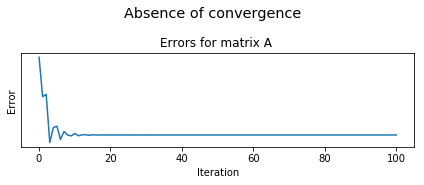

In [17]:
# Plots
fig = plt.figure()
title = fig.suptitle("Absence of convergence", fontsize="x-large")

errplot = fig.add_subplot(2,1,1)
errplot.plot(res_A)
errplot.set_title('Errors for matrix A ')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Error')
errplot.set_yscale('log')

plt.tight_layout()
fig.subplots_adjust(top=0.82)
plt.show()

In [18]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    # enter your code here
    return y

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<)≡☆


* Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$.


* (Bonus) Does it look suspicious? Why? Discuss what could cause such results.

### 3. QR algorithm (10 pts)

* Implement QR-algorithm without shifting. Prototype of the function is given below

In [20]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    for i in range(num_iter):
        Q, R = householder_qr(A)
        A = R@Q
    return Ak, convergence

#### Symmetric case

- Create **symmetric** tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops. 
- Run $300$ iterations of the QR algorithm for this matrix. 
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

<img src=https://pbs.twimg.com/media/Bq6t17OIMAALkiA.jpg width=30%/>
*Photo comment*: professor Gilbert Strang (MIT) "These are 121 cupcakes with my favorite -1, 2, -1 matrix. It was the day before Thanksgiving and two days before my birthday. A happy surprise." 

#### Nonsymmetric case

- Create **nonsymmetric** tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops. 
- Run $200$ iterations of the QR algorithm for this matrix. 
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?